In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

In [32]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Artificial Neural Network Model
class ArtificialNeuralNetwork(nn.Module):
    def __init__(self):
        super(ArtificialNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.network = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        return self.network(x)


Using device: cuda


In [33]:
# Training function with metrics tracking
def train_and_evaluate_model(model, train_loader, val_loader, test_loader, num_epochs=20):
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Tracking metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for batch_idx, (data, targets) in enumerate(train_loader):
            data, targets = data.to(device), targets.to(device)
            
            # Forward pass
            outputs = model(data)
            loss = criterion(outputs, targets)
            
            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += targets.size(0)
            train_correct += (predicted == targets).sum().item()
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for data, targets in val_loader:
                data, targets = data.to(device), targets.to(device)
                outputs = model(data)
                loss = criterion(outputs, targets)
                
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += targets.size(0)
                val_correct += (predicted == targets).sum().item()
        
        # Calculate metrics
        train_epoch_loss = train_loss / len(train_loader)
        val_epoch_loss = val_loss / len(val_loader)
        train_epoch_acc = 100 * train_correct / train_total
        val_epoch_acc = 100 * val_correct / val_total
        
        # Store metrics
        train_losses.append(train_epoch_loss)
        val_losses.append(val_epoch_loss)
        train_accuracies.append(train_epoch_acc)
        val_accuracies.append(val_epoch_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {train_epoch_loss:.4f}, Train Acc: {train_epoch_acc:.2f}%')
        print(f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.2f}%')
    
    # Final testing
    model.eval()
    test_correct = 0
    test_total = 0
    
    with torch.no_grad():
        for data, targets in test_loader:
            data, targets = data.to(device), targets.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            test_total += targets.size(0)
            test_correct += (predicted == targets).sum().item()
    
    test_accuracy = 100 * test_correct / test_total
    print(f'\nFinal Test Accuracy: {test_accuracy:.2f}%')
    
    return {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'test_accuracy': test_accuracy
    }

In [34]:
# Visualization function
def plot_training_metrics(metrics):
    plt.figure(figsize=(12, 5))
    
    # Loss subplot
    plt.subplot(1, 2, 1)
    plt.plot(metrics['train_losses'], label='Train Loss')
    plt.plot(metrics['val_losses'], label='Validation Loss')
    plt.title('Loss Progression')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy subplot
    plt.subplot(1, 2, 2)
    plt.plot(metrics['train_accuracies'], label='Train Accuracy')
    plt.plot(metrics['val_accuracies'], label='Validation Accuracy')
    plt.title('Accuracy Progression')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


In [35]:
# Test on random image
def test_random_image(model, test_dataset):
    # Select a random image
    idx = np.random.randint(len(test_dataset))
    image, true_label = test_dataset[idx]
    
    # Prepare image for prediction
    image = image.unsqueeze(0).to(device)
    model.eval()
    
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
        predicted_label = predicted.item()
    
    # Visualize
    plt.figure(figsize=(6, 4))
    plt.imshow(image.cpu().squeeze().numpy(), cmap='gray')
    plt.title(f'True Label: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()
    
    return true_label, predicted_label

Epoch [1/20]
Train Loss: 0.3880, Train Acc: 88.12%
Val Loss: 0.1730, Val Acc: 94.57%
Epoch [2/20]
Train Loss: 0.1837, Train Acc: 94.57%
Val Loss: 0.1276, Val Acc: 96.20%
Epoch [3/20]
Train Loss: 0.1422, Train Acc: 95.65%
Val Loss: 0.1118, Val Acc: 96.78%
Epoch [4/20]
Train Loss: 0.1219, Train Acc: 96.34%
Val Loss: 0.1009, Val Acc: 96.92%
Epoch [5/20]
Train Loss: 0.1096, Train Acc: 96.61%
Val Loss: 0.0999, Val Acc: 97.11%
Epoch [6/20]
Train Loss: 0.0973, Train Acc: 97.06%
Val Loss: 0.0944, Val Acc: 97.09%
Epoch [7/20]
Train Loss: 0.0893, Train Acc: 97.23%
Val Loss: 0.0913, Val Acc: 97.38%
Epoch [8/20]
Train Loss: 0.0849, Train Acc: 97.36%
Val Loss: 0.0887, Val Acc: 97.37%
Epoch [9/20]
Train Loss: 0.0784, Train Acc: 97.53%
Val Loss: 0.0935, Val Acc: 97.26%
Epoch [10/20]
Train Loss: 0.0701, Train Acc: 97.84%
Val Loss: 0.0968, Val Acc: 97.34%
Epoch [11/20]
Train Loss: 0.0693, Train Acc: 97.82%
Val Loss: 0.0841, Val Acc: 97.77%
Epoch [12/20]
Train Loss: 0.0642, Train Acc: 98.01%
Val Loss: 0

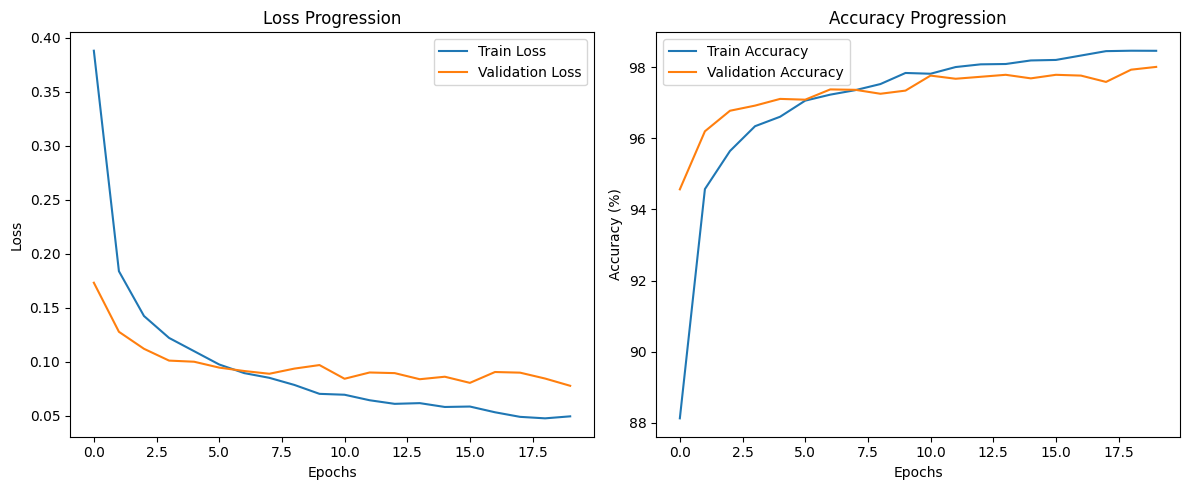

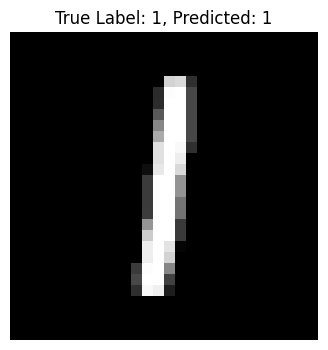

True Label: 1, Predicted Label: 1
Model saved successfully!


In [36]:
# Main execution
def main():
    # Data transformations
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    
    # Download and load MNIST dataset
    full_dataset = torchvision.datasets.MNIST(
        root='./MNISTdata', 
        train=True, 
        download=True, 
        transform=transform
    )
    
    # Split dataset into train, validation, and test
    train_size = int(0.7 * len(full_dataset))
    val_size = int(0.15 * len(full_dataset))
    test_size = len(full_dataset) - train_size - val_size
    
    train_dataset, val_dataset, _ = random_split(
        full_dataset, 
        [train_size, val_size, test_size]
    )
    
    # Separate test dataset
    test_dataset = torchvision.datasets.MNIST(
        root='./MNISTdata', 
        train=False, 
        download=True, 
        transform=transform
    )
    
    # Data loaders
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    
    # Initialize model
    model = ArtificialNeuralNetwork().to(device)
    
    # Train and evaluate
    metrics = train_and_evaluate_model(model, train_loader, val_loader, test_loader)
    
    # Plot training metrics
    plot_training_metrics(metrics)
    
    # Test on random image
    true_label, predicted_label = test_random_image(model, test_dataset)
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    
    # Optional: Save the model
    torch.save(model.state_dict(), 'mnist_ann_model.pth')
    print("Model saved successfully!")

# Run the main function
if __name__ == '__main__':
    main()